# 회귀분석 on 평점 & 매출액
### 네이버 api+영진위

In [1]:
import numpy as np
import pandas as pd
import json
import time

In [27]:
df = pd.read_csv('C:/Python/movie-data-analysis/data/movie.csv', encoding='ms949', index_col=[0,1])

In [28]:
# 최근 3년간 데이터
df = df.query('year>=2016')

In [31]:
df.reset_index(inplace=True)

In [103]:
# 영화 이름만 리스트에 담음
movie_title = df['영화명'].values.tolist()
movie_title

['부산행',
 '검사외전',
 '캡틴 아메리카: 시빌 워',
 '밀정',
 '터널',
 '인천상륙작전',
 '곡성',
 '덕혜옹주',
 '닥터 스트레인지',
 '주토피아',
 '신비한 동물사전',
 '아가씨',
 '쿵푸팬더3',
 '귀향',
 '데드풀',
 '나우 유 씨 미 2',
 '엑스맨: 아포칼립스',
 '미스 페레그린과 이상한 아이들의 집',
 '히말라야',
 '제이슨 본',
 '도리를 찾아서',
 '아수라',
 '정글북',
 '마이펫의 이중생활',
 '라라랜드',
 '배트맨 대 슈퍼맨: 저스티스의 시작',
 '굿바이 싱글',
 '봉이 김선달',
 '레버넌트: 죽음에서 돌아온 자',
 '컨저링 2',
 '내부자들: 디 오리지널',
 '수어사이드 스쿼드',
 '인디펜던스 데이 : 리써전스',
 '탐정 홍길동: 사라진 마을',
 '벤허',
 '굿 다이노',
 '셜록: 유령신부',
 '특별수사: 사형수의 편지',
 '시간이탈자',
 '동주',
 '워크래프트: 전쟁의 서막',
 '스타트렉 비욘드',
 '미씽: 사라진 여자',
 '당신, 거기 있어줄래요',
 '라이트 아웃',
 '오빠생각',
 '날, 보러와요',
 '씽',
 '맨 인 더 다크',
 '고산자, 대동여지도',
 '미 비포 유',
 '매그니피센트 7',
 '갓 오브 이집트',
 '레전드 오브 타잔',
 '좋아해줘',
 '브리짓 존스의 베이비',
 '런던 해즈 폴른',
 '국가대표 2',
 '앵그리버드 더 무비',
 '그날의 분위기',
 '널 기다리며',
 '설리: 허드슨강의 기적',
 '잭 리처: 네버 고 백',
 '로그 원: 스타워즈 스토리',
 '싱 스트리트',
 '아이스 에이지: 지구 대충돌',
 '몬스터 호텔 2',
 '메카닉: 리크루트',
 '고스트버스터즈',
 '거울나라의 앨리스',
 '가려진 시간',
 '명탐정 코난: 순흑의 악몽',
 '해어화',
 '계춘할망',
 '로봇, 소리',
 '스타워즈: 깨어난 포스',
 '빅쇼트',
 '헌츠맨: 윈터스 워',
 '나의 소녀시대',
 '조선마술

In [6]:
import os
import sys
import urllib.request

client_id = "PAsKLiqEIeAcb0BGXcAv"
client_secret = "toPoLTL6en"
movie = []

In [7]:
for i in range(300):
    encText = urllib.parse.quote(movie_title[i])

    url = "https://openapi.naver.com/v1/search/movie?query=" + encText # json 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode==200):
        response_body = response.read()
        movie.append(response_body.decode('utf-8'))
        time.sleep(1)
    else:
        print("Error Code:" + rescode)

In [104]:
len(movie)

300

In [111]:
json.loads(movie[0])['items'][0]['userRating']

'7.99'

In [10]:
# rating 이라는 빈 리스트에 userRating만 담는다
rating = []
for i in range(len(movie)):
    rating.append(json.loads(movie[i])['items'][0]['userRating'])

In [112]:
len(rating)

300

In [113]:
rating

['7.99',
 '7.94',
 '8.67',
 '8.42',
 '9.17',
 '8.02',
 '0.00',
 '7.61',
 '8.35',
 '8.71',
 '0.00',
 '9.35',
 '9.55',
 '0.00',
 '7.67',
 '8.62',
 '7.85',
 '8.70',
 '8.31',
 '0.00',
 '8.20',
 '8.45',
 '9.50',
 '8.39',
 '8.52',
 '10.00',
 '7.34',
 '10.00',
 '8.59',
 '6.85',
 '8.09',
 '7.71',
 '7.82',
 '8.23',
 '9.04',
 '6.81',
 '7.27',
 '7.74',
 '8.26',
 '8.78',
 '7.15',
 '8.30',
 '7.11',
 '9.36',
 '8.67',
 '8.21',
 '8.37',
 '8.69',
 '7.37',
 '9.00',
 '7.25',
 '5.00',
 '7.94',
 '7.22',
 '8.49',
 '7.92',
 '7.36',
 '7.65',
 '8.22',
 '8.84',
 '0.00',
 '7.36',
 '8.67',
 '0.00',
 '8.20',
 '6.50',
 '0.00',
 '7.59',
 '9.14',
 '7.14',
 '8.45',
 '9.02',
 '8.20',
 '8.59',
 '6.60',
 '10.00',
 '8.30',
 '8.45',
 '8.98',
 '8.01',
 '8.78',
 '8.47',
 '1.00',
 '8.48',
 '7.62',
 '0.00',
 '8.82',
 '6.59',
 '6.23',
 '7.56',
 '7.16',
 '8.37',
 '8.73',
 '0.00',
 '7.84',
 '0.00',
 '7.43',
 '7.51',
 '8.30',
 '7.41',
 '9.04',
 '7.83',
 '8.27',
 '9.27',
 '0.00',
 '5.28',
 '8.30',
 '9.09',
 '8.79',
 '8.39',
 '8.83'

In [32]:
# 평점 컬럼에 추가
df['평점'] = rating
df

,year,rank,index,영화명,개봉일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,제작사,배급사,등급,장르,감독,배우,평점
0,2016,1,600,부산행,2016-07-20,93178283048,93178283048,11565479,11565479,1788,151315,한국,(주)영화사레드피터,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,스릴러",연상호,"공유,김정희,정유미,김율호,마동석,최우식,안소희,김의성,김수안,박민우,박민혁,임종훈...",7.99
1,2016,2,601,검사외전,2016-02-03,77320403264,77320403264,9707581,9707581,1812,153532,한국,"(주)영화사 월광,(주)사나이픽처스",(주)쇼박스,15세이상관람가,"범죄,코미디",이일형,"황정민,강동원,이성민,박성웅,김응수,신소율,주진모,김원해,김홍파,김병옥,박종환,전배...",7.94
2,2016,3,602,캡틴 아메리카: 시빌 워,2016-04-27,72672111827,72672111827,8677249,8677249,1991,161696,미국,NaN,월트디즈니컴퍼니코리아(주),12세이상관람가,"액션,SF,스릴러","안소니 루소,조 루소","크리스 에반스,로버트 다우니 주니어,스칼렛 요한슨,세바스찬 스탠,안소니 마키,돈 치...",8.67
3,2016,4,603,밀정,2016-09-07,61269783831,61269783831,7500420,7500420,1444,138161,한국,"(주)다크서클픽쳐스,워너브러더스 코리아(주),(주)영화사하얼빈",워너브러더스 코리아(주),15세이상관람가,액션,김지운,"송강호,공유,한지민,츠루미 신고,엄태구,신성록,서영주,박민우,이진한,이진한,임서영,...",8.42
4,2016,5,604,터널,2016-08-10,57529484417,57529484417,7120508,7120508,1105,113201,한국,"(주)어나더썬데이,(주)비에이엔터테인먼트",(주)쇼박스,12세이상관람가,드라마,김성훈,"하정우,배두나,오달수,김종수,임한빈,정민희,송민석,윤성민,이동진,이상희,최춘범,권승...",9.17
5,2016,6,605,인천상륙작전,2016-07-27,55101410303,55101410303,7049643,7049643,1049,97019,한국,(주)태원엔터테인먼트,씨제이이앤엠(주),12세이상관람가,"전쟁,드라마",이재한,"김정철,이정재,이범수,리암 니슨,진세연,정준호,박철민,김병옥,김선아,김영애,박성웅,...",8.02
6,2016,7,606,럭키,2016-10-13,56444461256,56444461256,6975290,6975290,1234,155977,한국,(주)용필름,(주)쇼박스,15세이상관람가,코미디,이계벽,"유해진,이준,조윤희,임지연,전혜빈,이동휘,박선용,박은미,정소리,이승철,최시형,홍의권...",0.00
7,2016,8,607,곡성,2016-05-12,55863520382,55863520382,6879908,6879908,1485,130322,한국,"(주)사이드미러,이십세기폭스 인터내셔널 프로덕션",이십세기폭스코리아(주),15세이상관람가,"미스터리,스릴러,드라마",나홍진,"곽도원,황정민,쿠니무라 준,천우희,김환희,허진,장소연,김도윤,손강국,전배수,황석정,...",7.61
8,2016,9,608,덕혜옹주,2016-08-03,44393828109,44393828109,5599229,5599229,964,97312,한국,"(주)하이브미디어코프,(주)영화사호필름 ,(주)디씨지플러스",롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"사극,드라마",허진호,"손예진,박해일,윤제문,라미란,정상훈,박수영,김소현,박주미,안내상,김재욱,김인우,백윤...",8.35
9,2016,10,609,닥터 스트레인지,2016-10-26,47481830396,47481830396,5446239,5446239,1503,162856,미국,NaN,월트디즈니컴퍼니코리아(주),12세이상관람가,"액션,어드벤처,판타지",스콧 데릭슨,"베네딕트 컴버배치,레이첼 맥아담스,틸다 스윈튼,매즈 미켈슨,치웨텔 에지오포,스콧 앳...",8.71


In [114]:
# 27개의 평점은 문제가 있음
df[df['평점']=='0.00']['영화명'].count()

0

In [36]:
df[df['평점']=='0.00'].index

Int64Index([  6,  10,  13,  19,  60,  63,  66,  85,  93,  95, 104, 125, 130,
            131, 134, 136, 167, 170, 176, 179, 181, 198, 210, 217, 223, 271,
            295],
           dtype='int64')

In [38]:
# 과감히 날려버리기
df.drop(df.index[df[df['평점']=='0.00'].index], inplace=True)
df[df['평점']=='0.00']['영화명'].count()

0

In [41]:
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()

In [76]:
x = np.array(df['평점'].values.astype(float).tolist())

In [77]:
x.shape

(273,)

In [79]:
x = x.reshape(-1,1)
x.shape

(273, 1)

In [99]:
import math
y = df['매출액'].apply(lambda x: log(x))
y

0      25.257781
1      25.071224
2      25.009224
3      24.838553
4      24.775563
5      24.732441
7      24.746177
8      24.516366
9      24.583613
11     24.336777
12     24.394503
14     24.284631
15     24.168187
16     24.028310
17     24.040923
18     23.946798
20     23.920627
21     23.807065
22     23.753669
23     23.779784
24     23.753588
25     23.747402
26     23.792139
27     23.688871
28     23.718805
29     23.662758
30     23.551331
31     23.509946
32     23.502542
33     23.480701
         ...    
268    22.215271
269    22.227544
270    22.072434
272    22.101865
273    22.230920
274    22.245159
275    22.139131
276    22.162645
277    22.132634
278    22.113692
279    22.024939
280    22.157756
281    22.063127
282    22.037240
283    21.974507
284    21.941452
285    21.826839
286    21.823962
287    21.802200
288    21.661506
289    21.647932
290    21.708822
291    21.594158
292    21.705865
293    21.696818
294    21.550372
296    21.488133
297    21.5776

In [100]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.006183303724543343


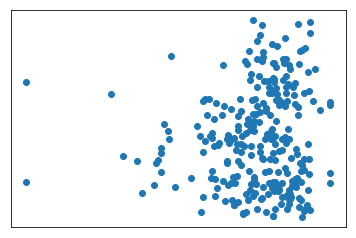

In [102]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
#plt.plot(x,y)
plt.xticks(())
plt.yticks(())

plt.show()